In [ ]:
# installing required libraries 
!pip install xlsxwriter
!pip install cssselect 
!pip install dask[complete]

In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing all the libraries
import sys
import pandas as pd                          # package to store and manipulate data
import numpy as np                           # package to store and manipulate data
import matplotlib.pyplot as plt              # plotting package
import operator
from collections import Counter
import itertools  
import collections
import urllib.request 
import dask.dataframe as dd
from geopy.geocoders import Nominatim
import seaborn as sns                        # plotting package 
import sklearn                               # model building package
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re                                    # packages to clean text
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
import nltk as nlp
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as mcolors
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv('drive/My Drive/traditional_spambots_1.csv') # loading data from google drive 

In [ ]:
df.head() # displying first 5 rows

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,22642586115,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282654000L,2010-08-31 21:24:14,0000-00-00 00:00:00,2014-04-16 23:57:17
1,22642583483,National Games Secretariat Recruitment 2010 :...,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282651000L,2010-08-31 21:24:11,0000-00-00 00:00:00,2014-04-16 23:57:17
2,22642524678,CIPET Recruitment Jobs at http://ping.fm/KnFCa,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282592000L,2010-08-31 21:23:12,0000-00-00 00:00:00,2014-04-16 23:57:17
3,22642504361,DIAT Recruitment 2010 at http://ping.fm/huS9m,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282571000L,2010-08-31 21:22:51,0000-00-00 00:00:00,2014-04-16 23:57:17
4,22642475789,BHEL Recruitment 2010 : http://ping.fm/PLWWA,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282543000L,2010-08-31 21:22:23,0000-00-00 00:00:00,2014-04-16 23:57:17


In [ ]:
df.describe()

,id,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions
count,1.450940e+05,1.450940e+05,753.0,1.450940e+05,1.450940e+05,145094.000000,0.0,0.0,0.0,145094.000000,145094.0,145094.0,0.0,0.0,0.0,145094.000000,145094.000000,145094.000000
mean,2.864096e+12,6.333770e+07,1.0,4.169188e+10,4.869879e+06,0.017913,NaN,NaN,NaN,0.000772,0.0,0.0,NaN,NaN,NaN,0.140261,0.675004,0.322598
std,4.821664e+13,2.897952e+07,0.0,4.699857e+12,1.876978e+07,0.132634,NaN,NaN,NaN,0.294031,0.0,0.0,NaN,NaN,NaN,0.503690,0.485584,0.986833
min,1.339545e+07,7.248952e+06,1.0,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,5.194570e+09,4.792965e+07,1.0,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,8.047275e+09,6.385714e+07,1.0,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,1.573186e+10,8.498424e+07,1.0,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,1.000000,0.000000
max,1.214997e+15,1.209203e+08,1.0,5.507043e+14,2.059866e+08,1.000000,NaN,NaN,NaN,112.000000,0.0,0.0,NaN,NaN,NaN,23.000000,4.000000,17.000000


In [ ]:
df['sample_tweet_text'] = df['text']

In [ ]:
# This function will extract the twitter handles of retweed people
def find_retweeted(sample_tweet_text):
     return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet.text)

In [ ]:
# This function will extract the twitter handles of people mentioned in the tweet
def find_mentioned(sample_tweet_text):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet_text)

In [ ]:
# This function will extract hashtags
def find_hashtags(sample_tweet_text):
     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',  sample_tweet_text)

In [ ]:
# Takes a string and removes web links from it   
def remove_links(sample_tweet_text):
    sample_tweet_text = re.sub(r'http\S+', '', sample_tweet_text)
    sample_tweet_text = re.sub(r'bit.ly/\S+', '', sample_tweet_text)
    sample_tweet_text = sample_tweet_text.strip('[link]')
    return sample_tweet_text

In [ ]:
# Takes a string and removes retweet and @user information
def remove_users(sample_tweet_text):
    sample_tweet_text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    sample_tweet_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    return sample_tweet_text

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

In [ ]:
df['sample_tweet_text'] = df['sample_tweet_text'].str.replace('[^\w\s]','')

In [ ]:
# cleaning tweets function
clean_tweet = []
for sample_tweet_text in df.sample_tweet_text: 
    sample_tweet_text = re.sub('[^a-zA-Z]',' ',str(sample_tweet_text))
    sample_tweet_text = sample_tweet_text.lower()               # lower case
    sample_tweet_text = remove_users(sample_tweet_text)         # remove user mentions 
    sample_tweet_text = remove_links(sample_tweet_text)         # remove links 
    sample_tweet_text = nltk.word_tokenize(sample_tweet_text)   # tokenization 
    tweet_token = [ word for word in sample_tweet_text if not word in set(stopwords.words('english'))]  # remove stopwords 
    tweet_token = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token]
    sample_tweet_text = " ".join(tweet_token)
    clean_tweet.append(sample_tweet_text)

In [ ]:
# cleaned text
clean_tweet    

['cppri recruit zh',
 'ation game secretariat recruit gg',
 'cipet recruit job',
 'diat recruit',
 'bhel recruit',
 'rd recruit vg',
 'jsac job meteorologist technic offic technic offic comput programm',
 'mazagon dock limit mdl recruit chief manag administr job ap',
 'ov diy pictur frame idea raksha bandhan gift',
 'chaudhari devi lal univers cdlu haryana academ admiss examin result',
 'visvesvaraya technolog univers vtu btech th semest examin result',
 'madra univers pg degre instant revalu examin result hcuc',
 'union public servic commiss upsc cati geologist catii hydrogeologist examin result',
 'upsc cd ii final result men women examin result l b',
 'ota univers bsc biochem part ii examin result u',
 'atest admiss news jyr',
 'atest examin updat',
 'director gener civil aviat dgca ame licenc examin result',
 'vinayaka mission univers vmu degre examin result',
 'gujarat univers part examin result ypka',
 'rajasthan sanskrit univers rsu ba shastri addit examin result',
 '',
 '',
 'b

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.1 MB/s 


In [ ]:
# importing vader sentiment tool
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [ ]:
# creating object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# creating new column of cleaned tweets 
df['clean_tweet'] = df['sample_tweet_text'].apply(lambda clean_tweet:clean_tweet)

In [ ]:
df.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,sample_tweet_text,clean_tweet
0,22642586115,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282654000L,2010-08-31 21:24:14,0000-00-00 00:00:00,2014-04-16 23:57:17,CPPRI Recruitment 2010 at httppingfmyp8zH,CPPRI Recruitment 2010 at httppingfmyp8zH
1,22642583483,National Games Secretariat Recruitment 2010 :...,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282651000L,2010-08-31 21:24:11,0000-00-00 00:00:00,2014-04-16 23:57:17,National Games Secretariat Recruitment 2010 ...,National Games Secretariat Recruitment 2010 ...
2,22642524678,CIPET Recruitment Jobs at http://ping.fm/KnFCa,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282592000L,2010-08-31 21:23:12,0000-00-00 00:00:00,2014-04-16 23:57:17,CIPET Recruitment Jobs at httppingfmKnFCa,CIPET Recruitment Jobs at httppingfmKnFCa
3,22642504361,DIAT Recruitment 2010 at http://ping.fm/huS9m,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282571000L,2010-08-31 21:22:51,0000-00-00 00:00:00,2014-04-16 23:57:17,DIAT Recruitment 2010 at httppingfmhuS9m,DIAT Recruitment 2010 at httppingfmhuS9m
4,22642475789,BHEL Recruitment 2010 : http://ping.fm/PLWWA,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282543000L,2010-08-31 21:22:23,0000-00-00 00:00:00,2014-04-16 23:57:17,BHEL Recruitment 2010 httppingfmPLWWA,BHEL Recruitment 2010 httppingfmPLWWA


In [ ]:
sid.polarity_scores(df.iloc[0]['clean_tweet'])    # example of first row polarity score 

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
# applying polarity scores to the cleaned tweets and making new column as scores
df['scores'] = df['clean_tweet'].apply(lambda clean_tweet:sid.polarity_scores(str(clean_tweet)))

In [ ]:
# making new column as compund scores 
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [ ]:
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [ ]:
df.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,sample_tweet_text,clean_tweet,scores,compound,score
0,22642586115,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282654000L,2010-08-31 21:24:14,0000-00-00 00:00:00,2014-04-16 23:57:17,CPPRI Recruitment 2010 at httppingfmyp8zH,CPPRI Recruitment 2010 at httppingfmyp8zH,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
1,22642583483,National Games Secretariat Recruitment 2010 :...,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282651000L,2010-08-31 21:24:11,0000-00-00 00:00:00,2014-04-16 23:57:17,National Games Secretariat Recruitment 2010 ...,National Games Secretariat Recruitment 2010 ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
2,22642524678,CIPET Recruitment Jobs at http://ping.fm/KnFCa,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282592000L,2010-08-31 21:23:12,0000-00-00 00:00:00,2014-04-16 23:57:17,CIPET Recruitment Jobs at httppingfmKnFCa,CIPET Recruitment Jobs at httppingfmKnFCa,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
3,22642504361,DIAT Recruitment 2010 at http://ping.fm/huS9m,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282571000L,2010-08-31 21:22:51,0000-00-00 00:00:00,2014-04-16 23:57:17,DIAT Recruitment 2010 at httppingfmhuS9m,DIAT Recruitment 2010 at httppingfmhuS9m,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
4,22642475789,BHEL Recruitment 2010 : http://ping.fm/PLWWA,"<a href=""http://www.ping.fm/"" rel=""nofollow"">P...",7248952,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,1283282543000L,2010-08-31 21:22:23,0000-00-00 00:00:00,2014-04-16 23:57:17,BHEL Recruitment 2010 httppingfmPLWWA,BHEL Recruitment 2010 httppingfmPLWWA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos


In [ ]:
# function for assigning tweets as postitive, neutral, and negative 
summary = {"positive":0,"neutral":0,"negative":0}
for clean_tweet in df.clean_tweet: 
    ss = sid.polarity_scores(str(clean_tweet))
    if ss["compound"] == 0.0:       # if compound score is 0 then it assigned as neutral 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:      # if compound score is greater than 0 then it assigned as positive
        summary["positive"] +=1
    else:
        summary["negative"] +=1      # if compound score is less than 0 then it assigned as positive
print(summary)

{'positive': 42108, 'neutral': 87187, 'negative': 15799}


In [ ]:
# creating the dataframe of the sentiemnts dictionary above 
data_items = summary.items()
data_list = list(data_items)
df_sentiment = pd.DataFrame(data_list)

In [ ]:
print(df_sentiment)

          0      1
0  positive  42108
1   neutral  87187
2  negative  15799


In [ ]:
df_sentiment.set_axis(["sentiment", "number_of_tweets"], axis =1, inplace =True)

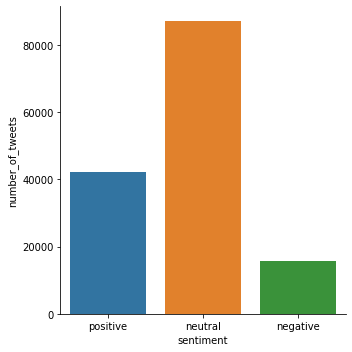

In [ ]:
# visualizing sentiment of tweets
sns.catplot(x="sentiment", y="number_of_tweets", kind="bar", data=df_sentiment)

In [ ]:
df_corr = df[["favorite_count", "retweet_count" ]] # assigning only favorite and retweets to df

In [ ]:
df_corr.isnull().values.sum()     # checking for null values 

0

In [ ]:
# normaalizing favorites and retweets to plot correlaion matrix
from sklearn import preprocessing
scalar = preprocessing.MinMaxScaler()
scalar_x = scalar.fit_transform(df_corr)
df_corr = pd.DataFrame(scalar_x)


In [ ]:
df_corr.head()

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
df_corr.set_axis(["favorite_count", "retweet_count"], axis =1, inplace = True)

In [ ]:
# finding the corrrelation between favorites and retweets
corr = df_corr.corr()
corr

,favorite_count,retweet_count
favorite_count,NaN,NaN
retweet_count,NaN,1.0


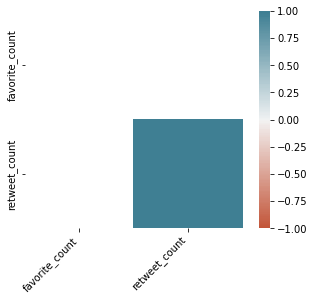

In [ ]:
# visualizing correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.gridspec import GridSpec

In [ ]:
# changing date format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index(df['timestamp'],inplace=True)
df.index
data_sample_from_pd = dd.from_pandas(df, npartitions=1)
data_sample_from_pd.index.head()

DatetimeIndex(['2007-07-04 14:31:29', '2007-07-04 14:38:07',
               '2007-07-04 14:38:35', '2007-07-26 11:08:44',
               '2008-04-07 23:16:56'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

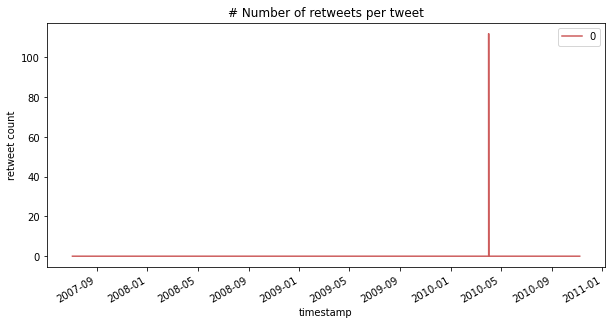

In [ ]:
# visualizing number of reweets per tweet
time_retweets = pd.DataFrame(data =df['retweet_count'].values, index = df['timestamp'])
time_retweets.plot(figsize=(10, 5), color='indianred')
plt.ylabel('retweet count') 
plt.title('# Number of retweets per tweet')
plt.savefig("retweets.pdf")

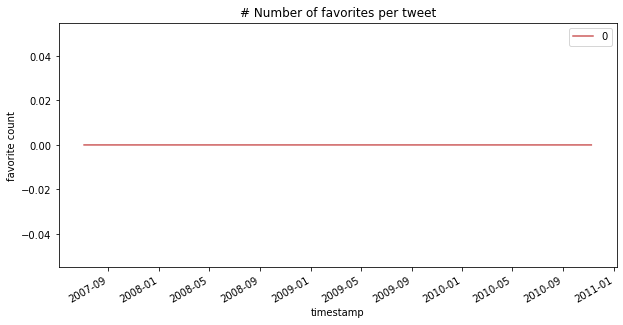

In [ ]:
# visualizing number of favorits per tweet
time_favorites = pd.DataFrame(data =df['favorite_count'].values, index = df['timestamp'])
time_favorites.plot(figsize=(10, 5), color='indianred')
plt.ylabel('favorite count') 
plt.title('# Number of favorites per tweet')
plt.savefig("favorites.pdf")

In [ ]:
df1 = pd.read_csv('/botwiki-2019_tweets.csv', encoding ="unicode_escape")    # reading botwiki dataset

In [ ]:
df1.head()  

,created_at,user/id,user/id_str,user/name,user/screen_name,user/location,user/description,user/url,user/entities/url/urls/0/url,user/entities/url/urls/0/expanded_url,user/entities/url/urls/0/display_url,user/entities/url/urls/0/indices/0,user/entities/url/urls/0/indices/1,user/protected,user/followers_count,user/friends_count,user/listed_count,user/created_at,user/favourites_count,user/utc_offset,user/time_zone,user/geo_enabled,user/verified,user/statuses_count,user/lang,user/contributors_enabled,user/is_translator,user/is_translation_enabled,user/profile_background_color,user/profile_background_image_url,user/profile_background_image_url_https,user/profile_background_tile,user/profile_image_url,user/profile_image_url_https,user/profile_banner_url,user/profile_link_color,user/profile_sidebar_border_color,user/profile_sidebar_fill_color,user/profile_text_color,user/profile_use_background_image,user/has_extended_profile,user/default_profile,user/default_profile_image,user/following,user/follow_request_sent,user/notifications,user/translator_type,user/entities/description/urls/0/url,user/entities/description/urls/0/expanded_url,user/entities/description/urls/0/display_url,user/entities/description/urls/0/indices/0,user/entities/description/urls/0/indices/1,user/entities/description/urls/1/url,user/entities/description/urls/1/expanded_url,user/entities/description/urls/1/display_url,user/entities/description/urls/1/indices/0,user/entities/description/urls/1/indices/1,user/entities/description/urls/2/url,user/entities/description/urls/2/expanded_url,user/entities/description/urls/2/display_url,user/entities/description/urls/2/indices/0,user/entities/description/urls/2/indices/1,ground_truth
0,Wed Jun 05 21:43:20 +0000 2019,9.693990e+17,9.693990e+17,Random Goth Lyric Generator,goth_lyrics,City of Dis,Esoteric dark verse from aeons before twitter ...,https://t.co/s9UkVMDACm,https://t.co/s9UkVMDACm,https://osric.com/rglg/,osric.com/rglg/,0.0,23.0,False,23,8,1,Fri Mar 02 02:27:13 +0000 2018,2,NaN,NaN,False,False,3792,NaN,False,False,False,0,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9694005168...,https://pbs.twimg.com/profile_images/969400516...,https://pbs.twimg.com/profile_banners/96939869...,0,0,0,0,False,True,False,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Tue Apr 02 13:26:02 +0000 2019,2.402023e+09,2.402023e+09,Transiting Now,transitingnow,Earth,Demonstrating the vast number of transiting ex...,https://t.co/L8ARV5JWBz,https://t.co/L8ARV5JWBz,http://brettmorr.is,brettmorr.is,0.0,23.0,False,322,8,21,Fri Mar 21 19:10:39 +0000 2014,34,NaN,NaN,False,False,407226,NaN,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/4548465757...,https://pbs.twimg.com/profile_images/454846575...,https://pbs.twimg.com/profile_banners/24020226...,9999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Wed Jun 05 20:22:03 +0000 2019,2.976541e+09,2.976541e+09,TheRiddlerBot,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,https://t.co/1v8BON9QpT,https://github.com/ivangro/theriddlerbot,github.com/ivangro/therid,0.0,23.0,False,171,86,32,Tue Jan 13 15:10:45 +0000 2015,1933,NaN,NaN,False,False,15668,NaN,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5553894937...,https://pbs.twimg.com/profile_images/555389493...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Wed Jun 05 18:56:21 +0000 2019,4.425829e+09,4.425829e+09,??????????????????,tiny_seas,sui.sexy,??? 

In [ ]:
df1['user'] = 'bot'   # all the users in the dataset are identified bots therefore assigning target as bots 

In [ ]:
df1.head()

,created_at,user/id,user/id_str,user/name,user/screen_name,user/location,user/description,user/url,user/entities/url/urls/0/url,user/entities/url/urls/0/expanded_url,user/entities/url/urls/0/display_url,user/entities/url/urls/0/indices/0,user/entities/url/urls/0/indices/1,user/protected,user/followers_count,user/friends_count,user/listed_count,user/created_at,user/favourites_count,user/utc_offset,user/time_zone,user/geo_enabled,user/verified,user/statuses_count,user/lang,user/contributors_enabled,user/is_translator,user/is_translation_enabled,user/profile_background_color,user/profile_background_image_url,user/profile_background_image_url_https,user/profile_background_tile,user/profile_image_url,user/profile_image_url_https,user/profile_banner_url,user/profile_link_color,user/profile_sidebar_border_color,user/profile_sidebar_fill_color,user/profile_text_color,user/profile_use_background_image,user/has_extended_profile,user/default_profile,user/default_profile_image,user/following,user/follow_request_sent,user/notifications,user/translator_type,user/entities/description/urls/0/url,user/entities/description/urls/0/expanded_url,user/entities/description/urls/0/display_url,user/entities/description/urls/0/indices/0,user/entities/description/urls/0/indices/1,user/entities/description/urls/1/url,user/entities/description/urls/1/expanded_url,user/entities/description/urls/1/display_url,user/entities/description/urls/1/indices/0,user/entities/description/urls/1/indices/1,user/entities/description/urls/2/url,user/entities/description/urls/2/expanded_url,user/entities/description/urls/2/display_url,user/entities/description/urls/2/indices/0,user/entities/description/urls/2/indices/1,ground_truth,user
0,Wed Jun 05 21:43:20 +0000 2019,9.693990e+17,9.693990e+17,Random Goth Lyric Generator,goth_lyrics,City of Dis,Esoteric dark verse from aeons before twitter ...,https://t.co/s9UkVMDACm,https://t.co/s9UkVMDACm,https://osric.com/rglg/,osric.com/rglg/,0.0,23.0,False,23,8,1,Fri Mar 02 02:27:13 +0000 2018,2,NaN,NaN,False,False,3792,NaN,False,False,False,0,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/9694005168...,https://pbs.twimg.com/profile_images/969400516...,https://pbs.twimg.com/profile_banners/96939869...,0,0,0,0,False,True,False,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,bot
1,Tue Apr 02 13:26:02 +0000 2019,2.402023e+09,2.402023e+09,Transiting Now,transitingnow,Earth,Demonstrating the vast number of transiting ex...,https://t.co/L8ARV5JWBz,https://t.co/L8ARV5JWBz,http://brettmorr.is,brettmorr.is,0.0,23.0,False,322,8,21,Fri Mar 21 19:10:39 +0000 2014,34,NaN,NaN,False,False,407226,NaN,False,False,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,http://pbs.twimg.com/profile_images/4548465757...,https://pbs.twimg.com/profile_images/454846575...,https://pbs.twimg.com/profile_banners/24020226...,9999,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,bot
2,Wed Jun 05 20:22:03 +0000 2019,2.976541e+09,2.976541e+09,TheRiddlerBot,TheRiddlerBot,"Coimbra, Portugal",Solve the riddle by replying only the name of ...,https://t.co/1v8BON9QpT,https://t.co/1v8BON9QpT,https://github.com/ivangro/theriddlerbot,github.com/ivangro/therid,0.0,23.0,False,171,86,32,Tue Jan 13 15:10:45 +0000 2015,1933,NaN,NaN,False,False,15668,NaN,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/5553894937...,https://pbs.twimg.com/profile_images/555389493...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,bot
3,Wed Jun 05 18:56:21 +0000 2019,4.425829e+09,4.425829e+09,??????????????????,tiny_s

In [ ]:
# renaming features
df1['Result'] = np.where(df1['user/followers_count'].max(axis=0)>(df1['user/friends_count']), 1, 0) 

In [ ]:
df1['Result']

0      1
1      1
2      1
3      1
4      1
      ..
693    1
694    1
695    1
696    1
697    1
Name: Result, Length: 698, dtype: int64

Text(24.125, 0.5, 'users_count')

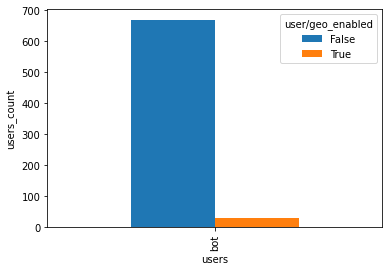

In [ ]:
# visualzing number of users geo enabled 
pd.crosstab(df1['user'], df1['user/geo_enabled']).plot.bar()
plt.savefig("users_geo_enabled.pdf")
plt.xlabel("users")
plt.ylabel("users_count")

Text(0, 0.5, 'users_count')

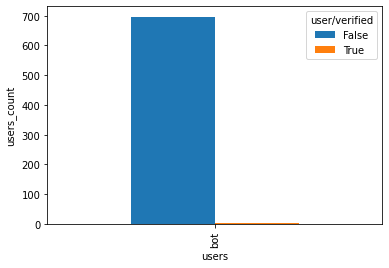

In [ ]:
# visualizing number of users verified 
pd.crosstab(df1['user'], df1['user/verified']).plot.bar()
plt.xlabel("users")
plt.ylabel("users_count")